<a href="https://colab.research.google.com/github/vijjipammi/pub/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BASIC TENSORFLOW MODEL - MNIST-FASHIONMNIST

In [ ]:
import os

In [ ]:
#!pip install tensorflow==2.2.0

## A Simple Deep learning Model with Tensorflow

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [ ]:
mnist = keras.datasets.mnist

(trainImgs, trainLabels), (testImgs, testLabels) = mnist.load_data()

In [ ]:
trainImgs.shape

(60000, 28, 28)

In [ ]:
len(trainLabels)

60000

In [ ]:
trainLabels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
len(trainLabels)

60000

In [ ]:
testImgs.shape

(10000, 28, 28)

In [ ]:
len(testLabels)

10000

In [ ]:
class_names=['Zero','One','Two', 'Three','Four','Five','Six', 'Seven','Eight', 'Nine']

In [ ]:
class_names[5]

'Five'

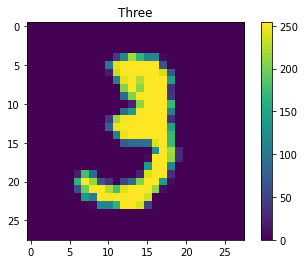

In [ ]:
plt.figure()
plt.imshow(trainImgs[10])
plt.colorbar()
plt.grid(False)
plt.title(class_names[trainLabels[10]])
plt.show()

## Normalize the Images


In [ ]:
trainImgs = trainImgs / 255.0

testImgs = testImgs / 255.0

## Print the Images

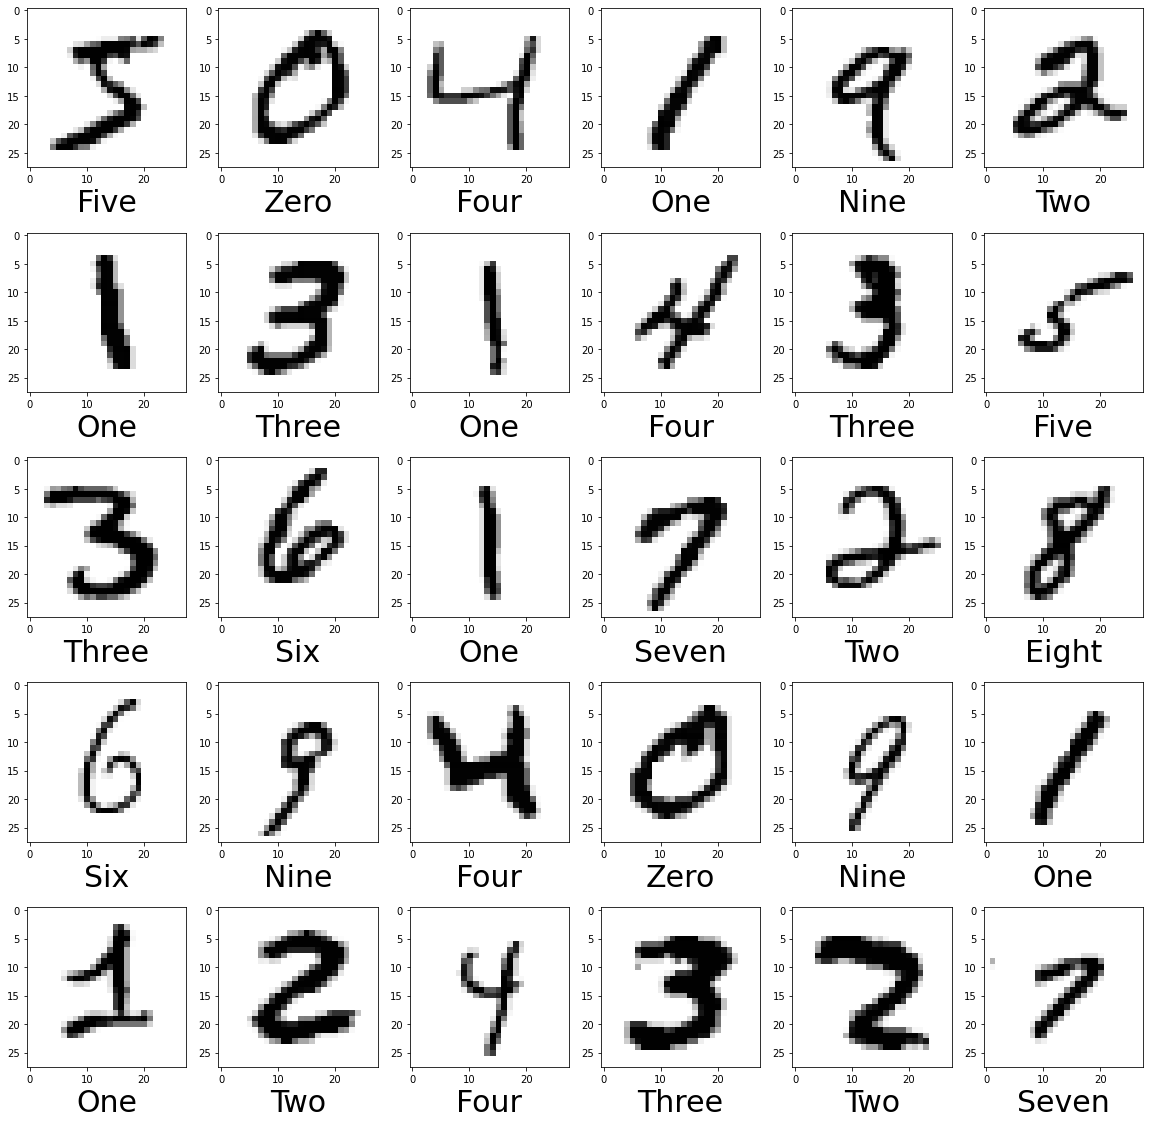

In [ ]:
plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(trainImgs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainLabels[i]],size=30)
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

## Build a Simple Linear/Dense Model

In [ ]:

inputs = tf.keras.Input(shape=(28,28))
x = keras.layers.Flatten(input_shape=(28, 28))(inputs)
x = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(10)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

## Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the Model

In [ ]:
model.fit(trainImgs, trainLabels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2044 - accuracy: 0.9387
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0857 - accuracy: 0.9737
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0600 - accuracy: 0.9814
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0424 - accuracy: 0.9865
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0341 - accuracy: 0.9891


## Calculate the Accuracy on Test Set

In [ ]:
test_loss, test_acc = model.evaluate(testImgs,  testLabels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0790 - accuracy: 0.9787

Test accuracy: 0.9786999821662903


# Now Build a *CNN* Model - MNIST

In [ ]:
mnist = keras.datasets.mnist

(trainImgs, trainLabels), (testImgs, testLabels) = mnist.load_data()

In [ ]:
import keras

inputs = keras.Input(shape=(28,28,1))
#x= tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = keras.layers.Conv2D(32,3, activation='relu')(inputs)
x = keras.layers.MaxPool2D(2,2)(x)

x = keras.layers.Conv2D(32,3, activation='relu')(x)
x = keras.layers.MaxPool2D(2,2)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.models.Model(inputs = inputs, outputs = outputs)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [ ]:
trainImgs= np.expand_dims(trainImgs,axis=3)
testImgs= np.expand_dims(testImgs,axis=3)

In [ ]:
trainImgs.shape

(60000, 28, 28, 1)

In [ ]:
trainImgs = trainImgs/255.0
testImgs = testImgs/255.0

In [ ]:
trainImgs.shape

(60000, 28, 28, 1)

In [ ]:
#trainLabels= np.expand_dims(trainLabels,axis=1)
#testLabels= np.expand_dims(testLabels,axis=1)

In [ ]:
trainLabels.shape

(60000,)

In [ ]:
model.fit(trainImgs, trainLabels, epochs=5, validation_data=(testImgs, testLabels))


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1420 - accuracy: 0.9577 - val_loss: 0.0521 - val_accuracy: 0.9826
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0306 - val_accuracy: 0.9888
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0334 - accuracy: 0.9899 - val_loss: 0.0396 - val_accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0283 - val_accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0312 - val_accuracy: 0.9896


In [ ]:
test_loss, test_acc = model.evaluate(testImgs,  testLabels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0312 - accuracy: 0.9896

Test accuracy: 0.9896000027656555


In [ ]:
layer_outputs = model.layers[4].output
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [ ]:
output_features=activation_model.predict(testImgs[0].reshape(1,28,28,1))




In [ ]:
output_features.shape

(1, 5, 5, 32)

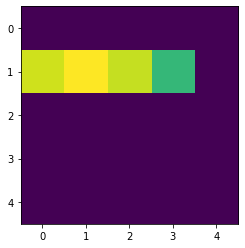

In [ ]:
output_features.shape
plt.imshow(output_features[0,:,:,0])

In [ ]:
testLabels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

8
layeroutput.shape (None, 26, 26, 32)
1 (1, 26, 26, 32)
(1, 26, 26, 32)
(26, 26)
(1, 26, 26, 32)
(26, 26)
(1, 26, 26, 32)
(26, 26)
(1, 26, 26, 32)
(26, 26)
layeroutput.shape (None, 13, 13, 32)
2 (1, 13, 13, 32)
(1, 13, 13, 32)
(13, 13)
(1, 13, 13, 32)
(13, 13)
(1, 13, 13, 32)
(13, 13)
(1, 13, 13, 32)
(13, 13)
layeroutput.shape (None, 11, 11, 32)
3 (1, 11, 11, 32)
(1, 11, 11, 32)
(11, 11)
(1, 11, 11, 32)
(11, 11)
(1, 11, 11, 32)
(11, 11)
(1, 11, 11, 32)
(11, 11)


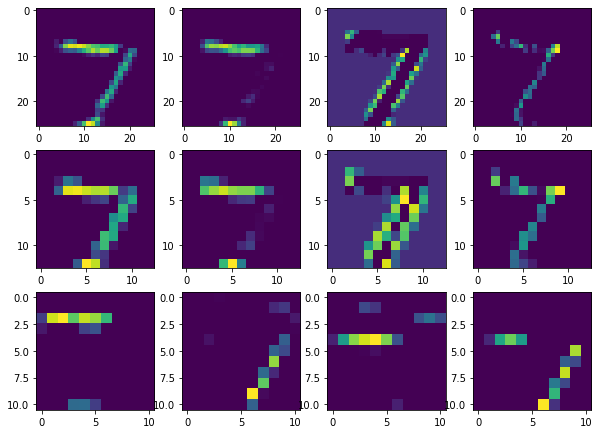

In [ ]:
FIRST_IMAGE=0
plt.figure(figsize=(10,10))
print(len(model.layers))
for layer_index in range(1,4):
  layer_outputs = model.layers[layer_index].output
  print('layeroutput.shape',layer_outputs.shape)
  activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

  output_features=activation_model.predict(testImgs[FIRST_IMAGE].reshape(1,28,28,1))
  print(layer_index, output_features.shape)
  for i in range(4):
    plt.subplot(4,4,(i+1)+4*layer_index)
    print(output_features.shape)
    print(output_features[0,:,:,i+10].shape)
    plt.imshow(output_features[0,:,:,i])